# Import the module

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import autocorrelation as ac
import importlib
import os

# Import data 

In [11]:
importlib.reload(ac)
pwd = os.getcwd()
custom_dir = "Jz_0.5/"
sdir = pwd + "/../files/" + custom_dir  
variables = ['Beta','L']
df = ac.run_autocorr_times(sdir, variables, ['Energy', 'Mag^2'])

print(df)

   Beta  L  Energy_tau_avg  Energy_tau_err  Mag^2_tau_avg  Mag^2_tau_err
0    40  4        1.111819        0.001785       1.398696       0.007282


# save data

In [10]:
importlib.reload(da)
save_dir = pwd + "/../MasterData/" 
print(save_dir)
output_file = "mData_L_Beta_Jz0.0.dat"
print(output_file)
da.savefile(df, save_dir, output_file)

/home/santanu/Dropbox/Square_Kitaev2D_analysis/SSEanalysis_src/../MasterData/
mData_L_Beta_Jz0.0.dat


# Plot data

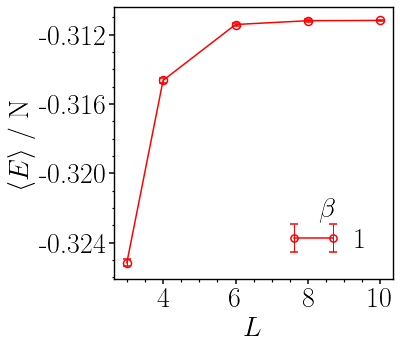

In [117]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming it's a CSV file, you can use the read_csv function
ifile = os.getcwd() + "/../MasterData/"  + "mData_L_Beta_Jz0.0.dat"

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 24
plt.rcParams['font.serif'] = "computer modern roman"
plt.rcParams['axes.linewidth'] = 1.5

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
fs = 28
beta = [1]
xye = ["L","Energy_avg","Energy_err"]
plot_data(ifile, ax, 'Beta', beta, xye)
ax.legend(labels=beta, frameon=False, loc='best', labelspacing=.2, handlelength=2, fontsize=fs, numpoints = 2, 
        title=r"$\beta$", title_fontsize=fs, markerscale=0.9, handletextpad=0.5)
ax.set_xlabel(r"$L$", fontsize = fs)
ax.set_ylabel(r"$\langle E \rangle$ / N", fontsize = fs)
plt.show()

In [115]:
import matplotlib as mpl
def plot_data(file, axv, gby, grouby_param, xye):
    df = pd.read_csv(file, delim_whitespace=True, comment='#')
    font_size = 28
    col = iter(["#E69F00", "#56B4E9", "#009E73", "#D55E00", "#CC79A7", "#F0E442", "#0072B2"])
    col = iter(["Red"])
    if len(xye) > 2:
        for keyy, group in df.groupby(gby):
            key = int(keyy) if float(keyy).is_integer() else keyy
            if keyy in grouby_param:
                axv.errorbar(group[xye[0]], group[xye[1]], yerr=group[xye[2]], c=next(col), label=key,
                             linestyle='-', marker='o', capthick=4, markerfacecolor='none', elinewidth=1,
                             markersize=8, capsize=4, markeredgewidth=1.5, linewidth=1.5)
    else:
        for keyy, group in df.groupby(gby):
            key = int(keyy) if float(keyy).is_integer() else keyy
            if keyy in grouby_param:
                axv.errorbar(group[xye[0]], group[xye[1]], c=next(col), label=key,
                             linestyle='-', marker='o', capthick=4, markerfacecolor='none', elinewidth=1,
                             markersize=8, capsize=4, markeredgewidth=1.5, linewidth=1.5)                

    for axis in [axv.xaxis, axv.yaxis]:
        axis.set_tick_params(which='major', length=5, width=1.5, labelsize=font_size)
        axis.set_tick_params(which='minor', length=2.5, width=1.2, labelsize=font_size)
        axis.set_major_locator(mpl.ticker.MaxNLocator(nbins=4))

    axv.minorticks_on()

    axv.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f"{x:.0f}"))
    axv.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f"{x:.3f}"))
    
    # Adjust the width of the axes
    axv.spines['top'].set_linewidth(1.4)    # Top border
    axv.spines['bottom'].set_linewidth(1.4) # Bottom border
    axv.spines['left'].set_linewidth(1.4)   # Left border
    axv.spines['right'].set_linewidth(1.4)  # Right border    
    
    

    

#     num_ticks = 4

#     Calculate tick positions
#     tick_positions = np.linspace(0, len(x_fit) - 1, num_ticks, dtype=int)

#     Set the ticks and labels
#     axv.set_xticks(x_fit[tick_positions])    
    
    
#     axv.set_ylabel(r"$\rho L$", fontsize=1.3*28, loc="center", c="black", labelpad=8)    
#     x_ticks = [0.15, 0.16, 0.17, 0.18]
#     axv.set_xticks(x_ticks)
#     axv.set_xticklabels(labels=x_ticks)    
#     axv.get_legend().remove()

#     trans = blended_transform_factory(x_transform=axv.transAxes, y_transform=axv.transAxes)
#     axv.annotate(label, xy=[0.85, 0.9], xycoords=trans, color="black", transform=axv.transAxes, fontsize=1.2*28)   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to calculate autocorrelation function
def autocorrelation_function(data):
    n = len(data)
    mean = np.mean(data)
    centered_data = data - mean
    autocorr = np.correlate(centered_data, centered_data, mode='full') / (np.var(data) * n)
    return autocorr[n-1:]

# Function to calculate integrated autocorrelation time
def integrated_autocorrelation_time(autocorr):
    tau_int = 0.5 + np.sum(autocorr)
    return tau_int

# Function to find autocorrelation time
def find_autocorrelation_time(autocorr, threshold=1/np.e):
    for t, value in enumerate(autocorr):
        if value < threshold:
            return t

# Function to perform blocking analysis
def blocking_analysis(data):
    n = len(data)
    block_sizes = [2**k for k in range(2,7)]
    mean_values = []

    for block_size in block_sizes:
        # Divide data into blocks
        blocks = [data[i:i + block_size] for i in range(0, n, block_size)]
        print(block_size)
        # Calculate mean for each block
        block_means = [np.mean(block) for block in blocks]

        # Calculate variance of block means
        variance = np.var(block_means)

        mean_values.append((np.mean(block_means), np.sqrt(variance)))

    return mean_values



file = "/home/santanu/Dropbox/Square_Kitaev2D_analysis/SSEanalysis_src/../files/Jz_0.5/Beta_40/L4/SSE_data_time_series.txt"
data = pd.read_csv(file, delim_whitespace=True, comment='#', usecols = ['Energy'])

# Ensure data is a 1-dimensional array
data = np.asarray(data).ravel()
print(data)
# Calculate autocorrelation function
autocorr = autocorrelation_function(data)


print(autocorr)
# Calculate integrated autocorrelation time
tau_int = integrated_autocorrelation_time(autocorr)

# Find autocorrelation time
autocorr_time = find_autocorrelation_time(autocorr)

# Perform blocking analysis to estimate error in autocorrelation time
blocking_results = blocking_analysis(data)
mean_values, errors = zip(*blocking_results)

# Plot autocorrelation function
plt.plot(autocorr)
plt.title(f'Autocorrelation Function (Autocorrelation Time: {autocorr_time})')
plt.xlabel('Time Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Print integrated autocorrelation time
print(f'Integrated Autocorrelation Time: {tau_int}')

# Plot blocking analysis results
plt.errorbar(range(1, len(mean_values) + 1), mean_values, yerr=errors, fmt='o-', label='Blocking Analysis')
plt.axhline(y=autocorr_time, color='red', linestyle='dashed', label='Autocorrelation Time')
plt.title('Blocking Analysis for Autocorrelation Time')
plt.xlabel('Block Index')
plt.ylabel('Mean')
plt.legend()
plt.show()



[-0.465625  -0.440625  -0.3703125 ... -0.4       -0.3859375 -0.3859375]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def auto_correlation(data, lag):
    n = len(data)
    mean = np.mean(data)
    numerator = np.sum((data[:n-lag] - mean) * (data[lag:] - mean))
    denominator = np.sum((data - mean)**2)
    return numerator / denominator if denominator != 0 else 0

def calculate_integrated_auto_correlation_time(data, max_lag):
    integrated_auto_correlation_time = 0.5  # Initial value
    print(data)
    for lag in range(1, max_lag + 1):
        correlation = auto_correlation(data, lag)
        if correlation > 0:
            integrated_auto_correlation_time += correlation
        else:
            print("Error: Tau is negative!")
            break  # Stop if correlation becomes negative

    return integrated_auto_correlation_time

file = "/home/santanu/Dropbox/Square_Kitaev2D_analysis/SSEanalysis_src/../files/Jz_0.5/Beta_40/L4/SSE_data_time_series.txt"
data = pd.read_csv(file, delim_whitespace=True, comment='#', usecols = ['Energy'])

# Ensure data is a 1-dimensional array
data = np.asarray(data).ravel()

autocorr_time = calculate_integrated_auto_correlation_time(data, 15)


# Print autocorrelation time
print(f'Autocorrelation Time: {autocorr_time}')


[-0.465625  -0.440625  -0.3703125 ... -0.4       -0.3859375 -0.3859375]
Autocorrelation Time: 1.1906225598674702


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def auto_correlation(data, lag):
    n = len(data)
    mean = np.mean(data)
    numerator = np.sum((data[:n-lag] - mean) * (data[lag:] - mean))
    denominator = np.sum((data - mean)**2)
    return numerator / denominator if denominator != 0 else 0

def calculate_integrated_auto_correlation_time(data, max_lag):
    integrated_auto_correlation_time = 0.0  # Initial value
    #print(data)
    for lag in range(0, max_lag + 1):
        correlation = auto_correlation(data, lag)
        if correlation > 0:
            integrated_auto_correlation_time += correlation
        else:
            #print("Error: Tau is negative!")
            break  # Stop if correlation becomes negative

    return integrated_auto_correlation_time

def calculate_auto_correlation_time(data, max_lag):
    auto_correlation_times = []
    for lag in range(1, max_lag + 1):
        correlation = auto_correlation(data, lag)
        if correlation > 0:
            auto_correlation_times.append(lag * correlation)
        else:
            break  # Stop if correlation becomes negative

    return np.sum(auto_correlation_times)

def block_resampling(data, block_size):
    n = len(data)
    num_blocks = n // block_size
    block_means = np.mean(data[:num_blocks * block_size].reshape((num_blocks, block_size)), axis=1)
    return block_means

def estimate_error(data, max_lag, num_blocks):
    n = len(data)
    block_sizes = [2**k for k in range(int(np.log2(n)) - 1)]  # Using 5 different block sizes
    auto_corr_times = []

    for block_size in block_sizes:
        block_means = block_resampling(data, block_size)
        auto_corr_time = calculate_integrated_auto_correlation_time(block_means, max_lag)
        auto_corr_times.append(auto_corr_time)

    mean_auto_corr_time = np.mean(auto_corr_times)
    std_dev_auto_corr_time = np.std(auto_corr_times)
    
    # Standard error of the mean
    error = std_dev_auto_corr_time / np.sqrt(num_blocks)
    return mean_auto_corr_time, error

file = "/home/santanu/Dropbox/Square_Kitaev2D_analysis/SSEanalysis_src/../files/Jz_0.5/Beta_40/L4/SSE_data_time_series.txt"
data = pd.read_csv(file, delim_whitespace=True, comment='#', usecols = ['Energy'])

# Ensure data is a 1-dimensional array
data = np.asarray(data).ravel()
auto_corr = calculate_integrated_auto_correlation_time(data, 15)


print(auto_corr)

#autocorr_time = calculate_integrated_auto_correlation_time(data, 10)
tau_mean, tau_err = estimate_error(data, 50, 1000)

# Print autocorrelation time
print(f'Autocorrelation <Tau>: {tau_mean}')
print(f'Autocorrelation d<Tau>: {tau_err}')

1.6906225598674707
Autocorrelation <Tau>: 1.2150904401624558
Autocorrelation d<Tau>: 0.006747026394165317


In [73]:
obs = ["Energy", "Mag"]

obs_tau = [f'{item}{suffix}' for item in obs for suffix in ["_avg", "_err"]]
df_tau   = pd.DataFrame([], columns=obs_tau) 

print(df_tau)

Empty DataFrame
Columns: [Energy_avg, Energy_err, Mag_avg, Mag_err]
Index: []
